SVC Accuracy: 0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80       412
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00     

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

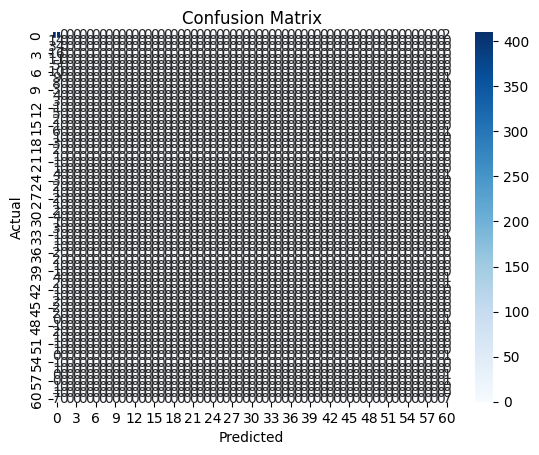

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
dataset = pd.read_csv('data.csv')

# Handle missing values
dataset = dataset.dropna()

# Encode categorical variable (if needed)
dataset['idEye'] = dataset['idEye'].astype('category').cat.codes  

# Define features and target
features = ['Ks', 'Kf', 'AvgK', 'CYL', 'AA', 'Ecc.9.0mm.', 'ACCP']
target = 'ESI.Posterior.'

# Check for missing columns
missing_cols = [col for col in features if col not in dataset.columns]
if missing_cols:
    print(f"Missing columns in dataset: {missing_cols}")
else:
    # Prepare data
    X = dataset[features]
    y = dataset[target]

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale numerical features (important for SVM)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Train Support Vector Classifier (SVC) with RBF Kernel
model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

